### Fourier Transform

#### The Fourier Transform is computed using the Fast Fourier Transform (FFT) Algorithm or the Discrete Fourier Transform (DFT) Algorithm. These methods allow discrete calculations to compute the signal in the frequency domain, rather than the time domain.
#### The FFT Algorithm uses the Fourier Transform mathematical characteristics for computation at a complexity of  $O(N logN) $ rather than a complexity of  $O(N ^2) $  using the DFT Algorithm.
#### In this script, I will compute these algorithms and compare their running times

In [15]:
#imports
import time
import matplotlib.pyplot as plt
import numpy as np
import scipy
from numpy import sqrt, sin, cos, pi, abs, arctan,tan, linspace, polyfit
import math

In [16]:
# Discrete Fourier Transform Algorithm 
def DFT(arr):
    # input: vector of points in the "time" domain
    # returns the DFT array in the "frequency" domain
    n = len(arr)
    
    return [sum((arr[k] * np.exp(-2 * np.pi * i * k / n * 1j) for k in range(n))) for i in range(n)]

# Fast Fourier Transform Algorithm
# Computed using recursion
def FFT(arr):
    # input: vector of points in the "time" domain, needs to be at a size of 2^n -> [2,4,8,16,32,64..]
    # returns the FFT array in the "frequency" domain 
    n = len(arr)
    
    # stop condition
    if n <= 1:
        return arr
    
    # recursion on even and odd numbers independently, see FFT theory for explanation
    even = FFT(arr[0::2])
    odd = FFT(arr[1::2])
    
    # calculate the odd part of the algorithm
    fodd = [np.exp(-2 * np.pi * k / n *1j) * odd[k] for k in range(n//2)]
    
    # to get to N points, add F_even + F_odd * M and F_even - F_odd * M, where M is the exponential matrix
    # at a length of N/2 for each list
    return [even[k] + fodd[k] for k in range(len(arr)//2)] + [even[k] - fodd[k] for k in range(len(arr)//2)]



DFT runtime:  6.197071313858032  sec
FFT runtime:  0.01749730110168457  sec
Python FFT runtime:  0.0  sec


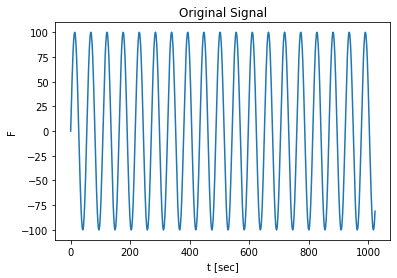

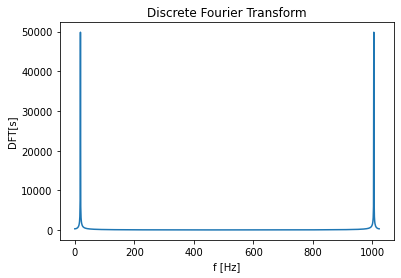

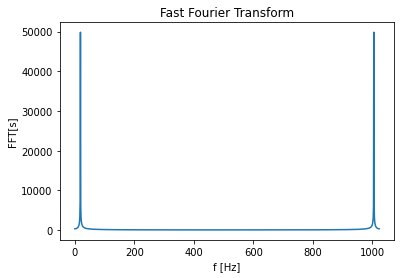

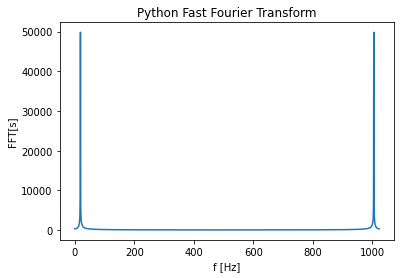

In [22]:
def perform_fourier(s):
    # input: signal in the "time" domain
    # performs the fourier transform using different methods
    dft = DFT(s)
    fft_alg = FFT(s)
    fft_py = scipy.fft.fft(s)
    
    return [dft,fft_alg,fft_py]

# Create a signal for an example - Can change to different signals with different parameters
# Note that to use the FFT algorithm, the "time" domain vector should be at the size of 2^n for n > 1
t = np.linspace(0, 2*np.pi, 1024, endpoint=True)
f = 3.0 # Frequency in Hz
A = 100.0 # Amplitude
s = A * np.sin(2*np.pi*f*t) # Sin Signal with a given frequency and amplitude, for a vector of "time" points

###############################################################################################################################
# time calculation of the DFT Algorithm
start = time.time() # start time
DFT(s)
end = time.time() # end time
print('DFT runtime: ', end - start, ' sec')

# time calculation of the FFT Algorithm
start = time.time() # start time
FFT(s) # calculate again for time measurements
end = time.time() # end time
print('FFT runtime: ', end - start, ' sec')


# time calculation of Python's FFT Algorithm from the Scipy library
start = time.time() # start time
scipy.fft.fft(s) # calculate again for time measurements
end = time.time() # end time
print('Python FFT runtime: ', end - start, ' sec')


###############################################################################################################################
dft,fft_alg,fft_py = perform_fourier(s)

# Plotting the original Signal
plt.plot(s)
plt.xlabel('t [sec]')
plt.ylabel('F')
plt.title('Original Signal')
plt.show()

# Plot of DFT
plt.plot(abs(dft))
plt.xlabel('f [Hz]')
plt.ylabel('DFT[s]')
plt.title('Discrete Fourier Transform')
plt.show()

# Plot of FFT
plt.plot(abs(fft_alg))
plt.xlabel('f [Hz]')
plt.ylabel('FFT[s]')
plt.title('Fast Fourier Transform')
plt.show()

# Plot of Python FFT
plt.plot(abs(fft_py))
plt.xlabel('f [Hz]')
plt.ylabel('FFT[s]')
plt.title('Python Fast Fourier Transform')
plt.show()